# Support Vector Machine (SVM)
Integrantes:
- Adrian Fulladolsa - 21592
- Jimena Hernández - 21199
- Emilio Solano - 21212
- Diego Hernández - 21270
- Linda Jimenez - 21169
- Javier Alvarado - 21188

## Importar las librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

## Importar el conjunto de datos

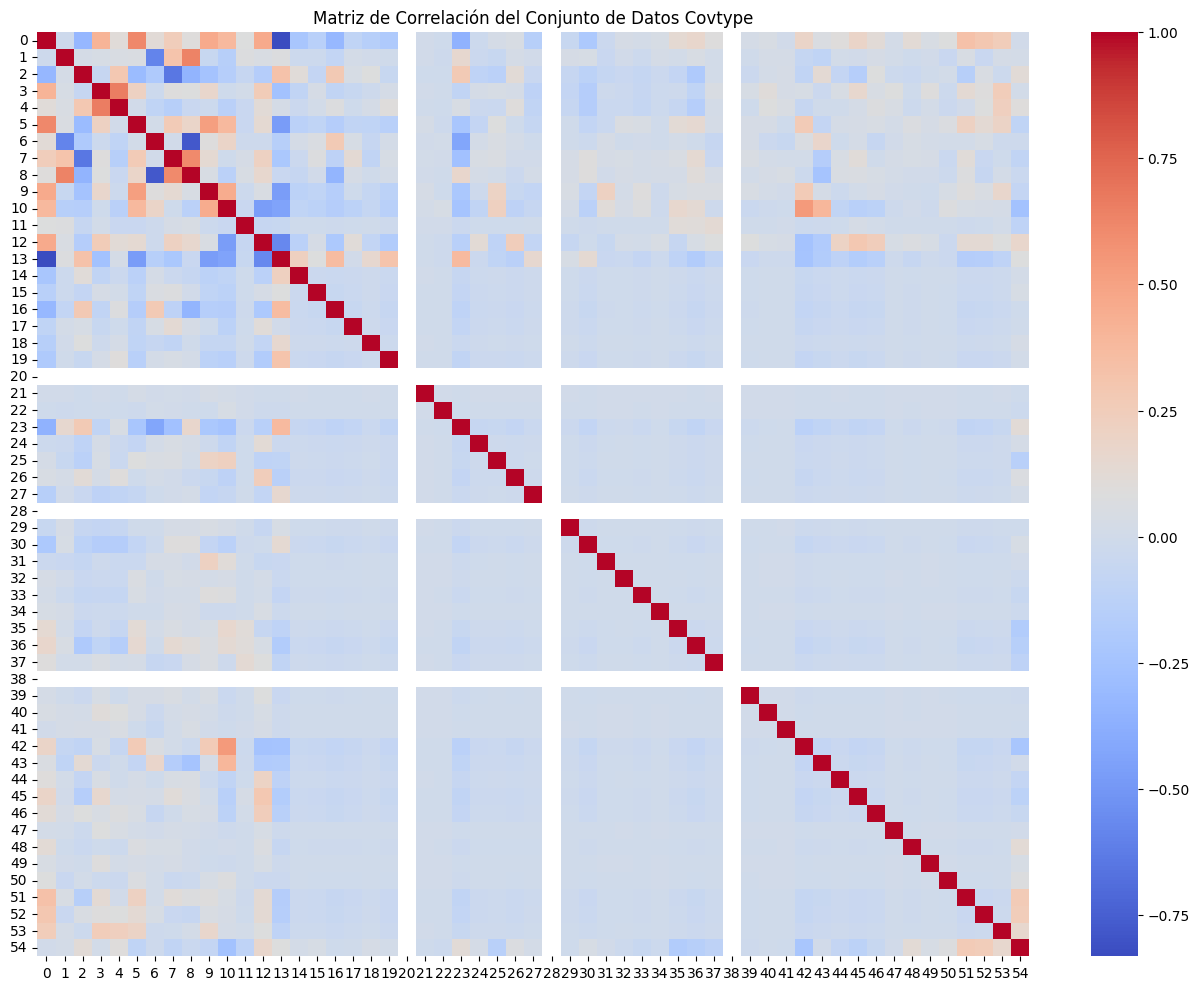

In [5]:


# Cargar datos del archivo covtype.data
df = pd.read_csv("covtype.data", header=None)

# Seleccionar las primeras 10,000 muestras
max_samples = 10000
df = df.head(max_samples)

# Generar la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación usando Seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación del Conjunto de Datos Covtype")
plt.show()


# Dividivir la variable respuesta del conjunto de datos

In [8]:
X = df.iloc[:, :-1].values  # Todas las filas, todas las columnas excepto la última
y = df.iloc[:, -1].values  # Todas las filas, última columna

## Dividir el conjunto de datos en un conjunto para entrenar y otro para pruebas

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd 

def evaluar_svm(num_muestras):
    X_subset, y_subset = X[:num_muestras], y[:num_muestras]

    X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_subset, y_subset, test_size=0.25, random_state=42)
    
    normalizador = StandardScaler()
    X_entreno = normalizador.fit_transform(X_entreno)
    X_prueba = normalizador.transform(X_prueba)

    clasificador = SVC(kernel='linear', random_state=42)
    inicio = time.time()
    clasificador.fit(X_entreno, y_entreno)
    fin = time.time()
    y_pred = clasificador.predict(X_prueba)
    
    mat_conf = confusion_matrix(y_prueba, y_pred)
    accuracy = accuracy_score(y_prueba, y_pred)
    tiempo_ejecucion = fin - inicio

    results[num_muestras] = { 
        'accuracyScore': accuracy,
        'executionTime': tiempo_ejecucion
    }
    
    return tiempo_ejecucion

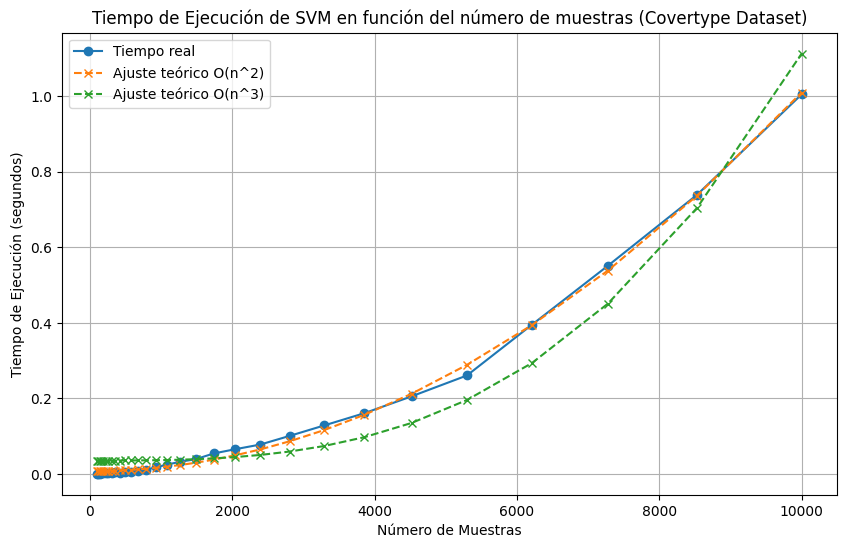

R^2 n^2= 0.998371238912041
R^2 n^3 = 0.9599901558358952
no. 100 : accuracy = 0.92, tiempo = 0.0010008811950683594
no. 117 : accuracy = 0.8333333333333334, tiempo = 0.0008060932159423828
no. 137 : accuracy = 0.7714285714285715, tiempo = 0.0012578964233398438
no. 161 : accuracy = 0.7317073170731707, tiempo = 0.0018601417541503906
no. 189 : accuracy = 0.75, tiempo = 0.0017549991607666016
no. 221 : accuracy = 0.75, tiempo = 0.0031900405883789062
no. 259 : accuracy = 0.7230769230769231, tiempo = 0.0020589828491210938
no. 304 : accuracy = 0.8421052631578947, tiempo = 0.002407073974609375
no. 356 : accuracy = 0.7865168539325843, tiempo = 0.004190921783447266
no. 418 : accuracy = 0.8476190476190476, tiempo = 0.0036711692810058594
no. 489 : accuracy = 0.7967479674796748, tiempo = 0.004868268966674805
no. 574 : accuracy = 0.7291666666666666, tiempo = 0.006473064422607422
no. 672 : accuracy = 0.7380952380952381, tiempo = 0.007903814315795898
no. 788 : accuracy = 0.7817258883248731, tiempo = 0.011

In [10]:
from sklearn.linear_model import LinearRegression
# Generar 30 tamaños de muestra de manera progresiva hasta el límite de max_samples
results = {}
tamanos_muestras = np.unique(np.round(np.logspace(np.log10(100), np.log10(max_samples), 30)).astype(int))
tiempos_ejecucion = [evaluar_svm(n) for n in tamanos_muestras]


# Generar tiempos teóricos basados en O(n^2)
tiempos_teoricos = [n**2 for n in tamanos_muestras]

tiempos_teoricos_n3 = [n**3 for n in tamanos_muestras]

# Realizar la regresión lineal
model = LinearRegression()
model.fit(np.array(tiempos_teoricos).reshape(-1, 1), tiempos_ejecucion)
tiempos_predichos = model.predict(np.array(tiempos_teoricos).reshape(-1, 1))

model_n3 = LinearRegression()
model_n3.fit(np.array(tiempos_teoricos_n3).reshape(-1, 1), tiempos_ejecucion)
tiempos_predichos_n3 = model_n3.predict(np.array(tiempos_teoricos_n3).reshape(-1, 1))

# Calcular R^2
r_squared = r2_score(tiempos_ejecucion, tiempos_predichos)

r_squared_n3 = r2_score(tiempos_ejecucion, tiempos_predichos_n3)

# Crear y mostrar la gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(tamanos_muestras, tiempos_ejecucion, marker='o', linestyle='-', label='Tiempo real')
plt.plot(tamanos_muestras, tiempos_predichos, marker='x', linestyle='--', label='Ajuste teórico O(n^2)')
plt.plot(tamanos_muestras, tiempos_predichos_n3, marker='x', linestyle='--', label='Ajuste teórico O(n^3)')
plt.title(f'Tiempo de Ejecución de SVM en función del número de muestras (Covertype Dataset)')
plt.xlabel('Número de Muestras')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.legend()
plt.grid(True)
plt.show()

print(f"R^2 n^2= {r_squared}")
print(f"R^2 n^3 = {r_squared_n3}")


for key, value in results.items():
    print(f"no. {key} : accuracy = {value['accuracyScore']}, tiempo = {value['executionTime']}")
